# Heart Disease prediction Model

## Information about Data

In [ ]:
# -Age is the age of candidate.
# -Sex has numeric values. 1 is male and 0 is female.
# -(cp)Chest Pain pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack. — Value 1: typical angina — Value 2: atypical angina — Value 3: non-anginal pain
# -(trestbps)Resting blood pressure is normal pressure with no exercise.
# -(chol)Cholesterol means the blockage for blood supply in the blood vessels.
# -(fbs)fasting blood sugar > 120 mg/dl (1 = true; 0 = false) blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.
# -(restecg)Rest ECG results means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening.
# -(thalach)The Maximum Heart Rate achieved.
# -(exang): exercise induced angina (1 = yes; 0 = no) is chest pain while exercising or doing any physical activity.
# -(oldpeak)ST Depression is the difference between value of ECG at rest and after exercise.

# -(slope): the slope of the peak exercise ST segment — Value 1: upsloping — Value 2: flat — Value 3: downsloping

# (ca): The number of major blood vessels(0-3) supplying blood to heart blocked.
# -(thal):The Types of thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
# -(target) (predicted attribute): diagnosis of heart disease (angiographic disease status) — Value 0: < 50% diameter narrowing — Value 1: > 50% diameter narrowing
# **Heart attack prediction where 1 denotes Heart attack occured and 0 where it din't take occur.

## Importing the dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Readig data

In [18]:
heart_data =pd.read_csv("C:/Users/singh/OneDrive/Desktop/Python_tutorial_datascience/Heart Disease detection project/heart_disease_data.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
heart_data.shape

(303, 14)

In [22]:
heart_data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
heart_data.rename(columns = {'age':'Age','sex':'Gender','cp':'Chest_pain' ,'trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_attack','slope':'ST_slope'} , inplace = True)
heart_data.head()

,Age,Gender,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [25]:
#GAH refer to gender,age and has Heart_attack 
#count of member has Heart_attack according his gender and age
GAH = heart_data.groupby(['Gender','Age'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack',ascending=False)
GAH.head(20).style.background_gradient(cmap='Purples')

# Conclusion :
# 1:Male
# 0:Female
# top 20 count of heart attack, males have witnessed more heart attacks for their ages.

,Gender,Age,Heart_attack
59,1,58,13
58,1,57,13
60,1,59,13
53,1,52,12
55,1,54,11
45,1,44,9
52,1,51,8
57,1,56,8
61,1,60,7
65,1,64,7


In [26]:
#GcH refer to gender , Chest_pain and has Heart_attack 
#count of member has Heart_attack according his Chest_pain and Gender
GcH = heart_data.groupby(['Gender' , 'Chest_pain'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GcH.head(20).style.background_gradient(cmap='Blues')

# Conclusion:
# The higher the number, the lesser are the odds of heart attack
# shows that large number of Male has Heart_Attack with Chest_pain less
# just 19 Man has Heart_Attack with Chest_pain higher
# for women 4 women has Heart_Attack with Chest_pain higher
# 39 women has Heart_Attack with Chest_pain less

,Gender,Chest_pain,Heart_attack
4,1,0,104
6,1,2,52
0,0,0,39
2,0,2,35
5,1,1,32
7,1,3,19
1,0,1,18
3,0,3,4


In [27]:
#GRH refer to gender , Resting_blood_pressure and has Heart_attack 
#count of member has Heart_attack according his Resting_blood_pressure and Gender
GRH = heart_data.groupby(['Gender' , 'Resting_blood_pressure'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GRH.head(8).style.background_gradient(cmap='coolwarm')

# Conclusion:
# count of Male 16 has Resting_blood_pressure 110 but count of women 12 has Resting_blood_pressure 130

,Gender,Resting_blood_pressure,Heart_attack
46,1,120,27
54,1,130,24
60,1,140,22
40,1,110,16
15,0,130,12
50,1,125,11
21,0,140,10
66,1,150,10


In [29]:
#GFH refer to gender , Fasting_blood_sugar and has Heart_attack 
#count of member has Heart_attack according his Fasting_blood_sugar and Gender
GFH = heart_data.groupby(['Gender' , 'Fasting_blood_sugar'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GFH.style.background_gradient(cmap='YlGn')

# Conclusion:
# When Fasting_blood_sugar was False --Heart_attack was highe for Male also with women

,Gender,Fasting_blood_sugar,Heart_attack
2,1,0,174
0,0,0,84
3,1,1,33
1,0,1,12


### (5) GECH(Gender , ECG_results and Heart_attack)

In [30]:
#GECH refer to gender , ECG_results and has Heart_attack 
#count of member has Heart_attack according his ECG_results and Gender
GECH = heart_data.groupby(['Gender' , 'ECG_results'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GECH.style.background_gradient(cmap='bone')

,Gender,ECG_results,Heart_attack
3,1,0,103
4,1,1,103
1,0,1,49
0,0,0,44
2,0,2,3
5,1,2,1


In [31]:
#GEH refer to gender , Maximum_heart_rate and has Heart_attack 
#count of member has Heart_attack according his Maximum_heart_rate and Gender
GEH = heart_data.groupby(['Gender' , 'Maximum_heart_rate'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GEH.head(10).style.background_gradient(cmap='summer')

,Gender,Maximum_heart_rate,Heart_attack
86,1,144,7
77,1,132,7
103,1,162,7
113,1,173,7
82,1,140,6
42,0,172,6
91,1,150,6
70,1,125,6
97,1,156,6
34,0,163,5


In [32]:
#GEiH refer to gender , Exercise_induced_angina and has Heart_attack 
#count of member has Heart_attack according his Exercise_induced_angina and Gender
GEiH = heart_data.groupby(['Gender' , 'Exercise_induced_angina'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GEiH.style.background_gradient(cmap='cool')

,Gender,Exercise_induced_angina,Heart_attack
2,1,0,130
3,1,1,77
0,0,0,74
1,0,1,22


In [33]:
#GSH refer to gender , ST_depression and has Heart_attack 
#count of member has Heart_attack according his ST_depression and Gender
GSH = heart_data.groupby(['Gender' , 'ST_depression'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GSH.head(10).style.background_gradient(cmap='Oranges')

,Gender,ST_depression,Heart_attack
27,1,0.000000,64
0,0,0.000000,35
37,1,1.200000,13
34,1,0.800000,10
36,1,1.000000,9
41,1,1.800000,8
38,1,1.400000,8
33,1,0.600000,8
43,1,2.000000,7
40,1,1.600000,7


In [34]:
#GSlH refer to gender , ST_slope and has Heart_attack 
#count of member has Heart_attack according his ST_slope and Gender
GSlH = heart_data.groupby(['Gender' , 'ST_slope'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GSlH.head(10).style.background_gradient(cmap='afmhot')

,Gender,ST_slope,Heart_attack
5,1,2,96
4,1,1,95
2,0,2,46
1,0,1,45
3,1,0,16
0,0,0,5


In [35]:
#GMH refer to gender , Major_vessels and has Heart_attack 
#count of member has Heart_attack according his Major_vessels and Gender
GMH = heart_data.groupby(['Gender' , 'Major_vessels'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GMH.head(10).style.background_gradient(cmap='afmhot')

,Gender,Major_vessels,Heart_attack
4,1,0,111
0,0,0,64
5,1,1,50
6,1,2,25
7,1,3,16
1,0,1,15
2,0,2,13
8,1,4,5
3,0,3,4


In [36]:
#GTH refer to gender , Thalassemia_types and has Heart_attack 
#count of member has Heart_attack according his Thalassemia_types and Gender
GTH = heart_data.groupby(['Gender' , 'Thalassemia_types'])['Heart_attack'].count().reset_index().sort_values(by='Heart_attack' , ascending=False)
GTH.head(20).style.background_gradient(cmap='GnBu')

,Gender,Thalassemia_types,Heart_attack
7,1,3,102
6,1,2,87
2,0,2,79
5,1,1,17
3,0,3,15
0,0,0,1
1,0,1,1
4,1,0,1


In [37]:
heart_data_corr=heart_data.corr().style.background_gradient(cmap='plasma')
heart_data_corr

,Age,Gender,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_attack
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ECG_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Maximum_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
ST_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


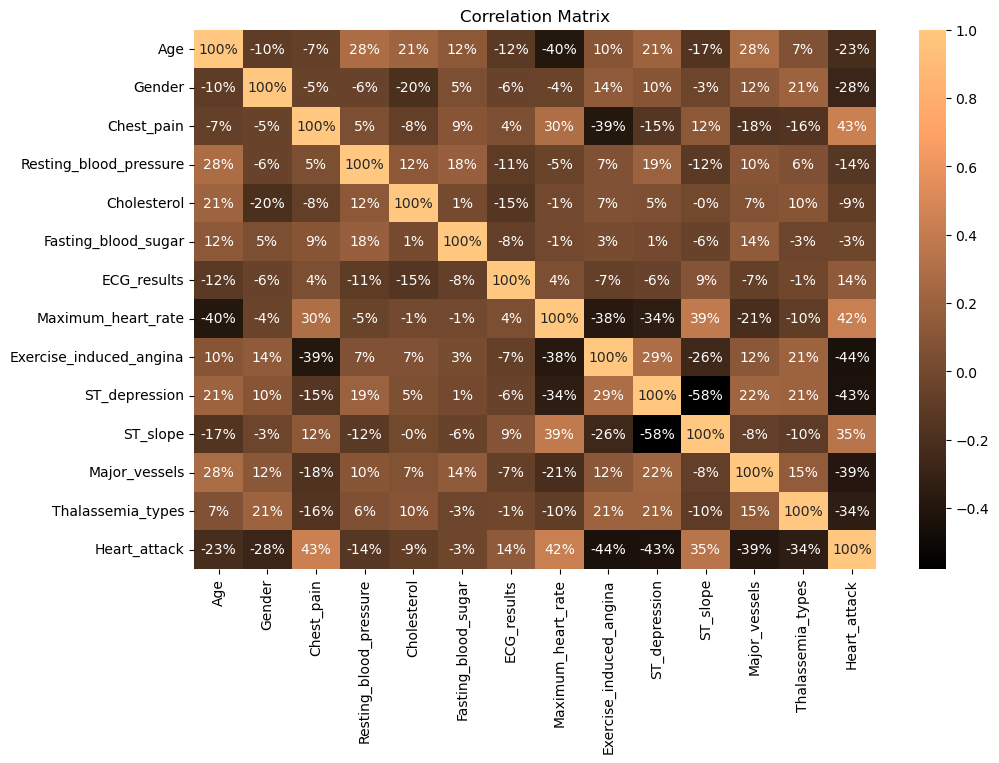

In [39]:
#corelation matrix with all Data
plt.figure(figsize=(11,7))
sns.heatmap(cbar=True,annot=True,fmt=".0%",data=heart_data.corr(),cmap='copper')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:>

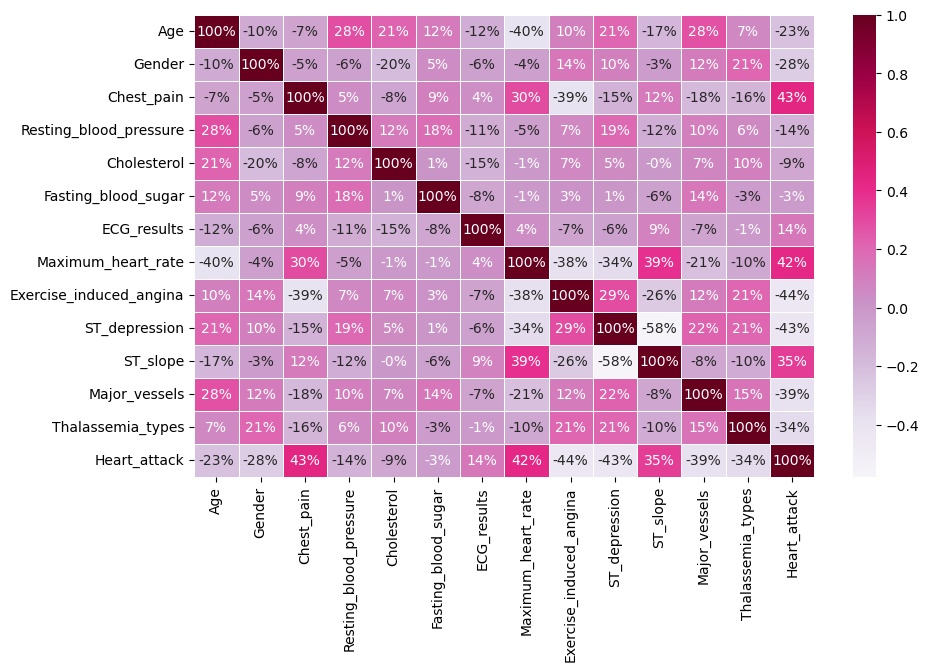

In [40]:
#corelation matrix with important Data
#data.drop(['Cholesterol' , 'Resting_blood_pressure', 'ECG_results' , 'Fasting_blood_sugar' , 'ST_slope']
  #       ,axis = 'columns' , inplace = True)
plt.figure(figsize=(10,6))
sns.heatmap(heart_data.corr() , annot=True,fmt=".0%",linewidth=0.5, cmap='PuRd')#linewidth=0.5 is space between numbers

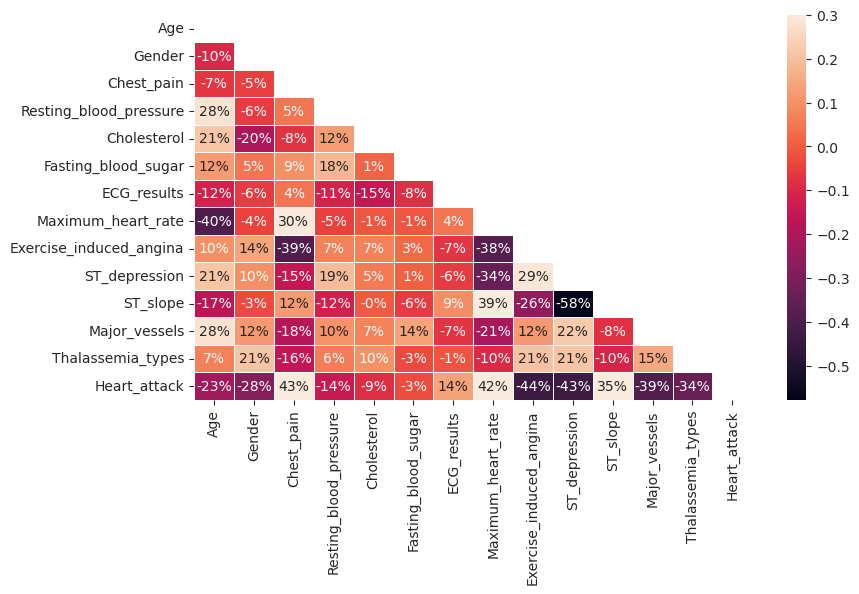

In [42]:
mask = np.zeros_like(heart_data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(9, 5))
    ax = sns.heatmap(heart_data.corr(), mask=mask, vmax=.3,annot=True,fmt=".0%",linewidth=0.5,square=False)
    #annot is numbers in squares
    #square=True the square is small but square=False the square is large

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

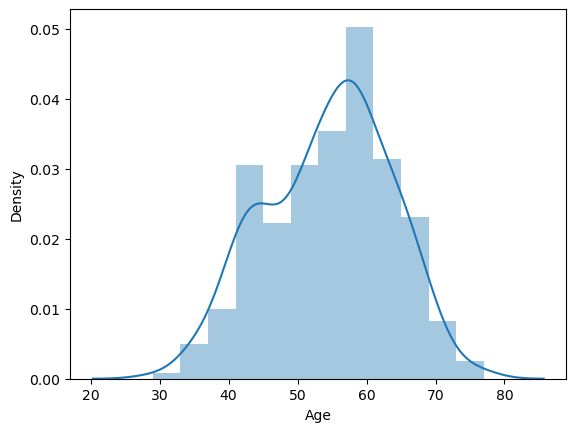

In [44]:
#Show histogram for Age 
sns.distplot(heart_data['Age'])

<AxesSubplot:xlabel='Chest_pain', ylabel='Count'>

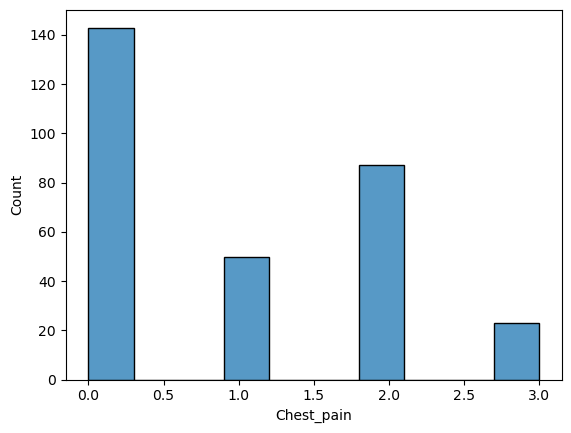

In [46]:
#Show histogram for Chest_pain
sns.histplot(heart_data['Chest_pain'])

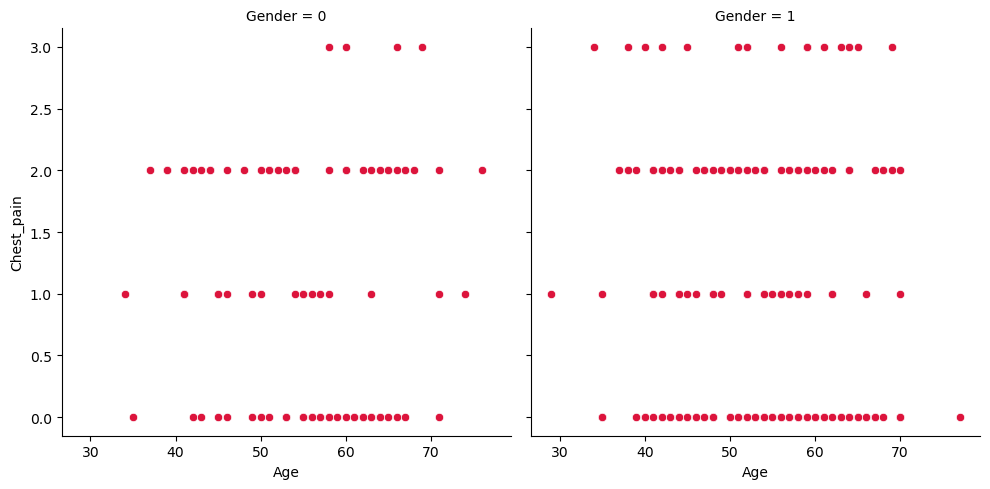

In [47]:
sns.relplot(x ='Age', y ='Chest_pain', col = 'Gender', data =heart_data, color = 'crimson')

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Maximum_heart_rate', ylabel='Density'>

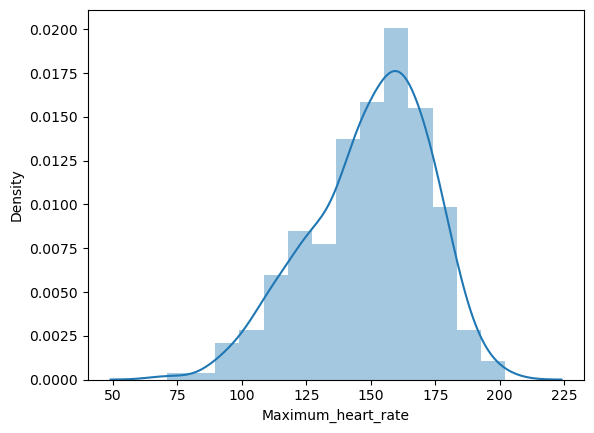

In [49]:
#Show histogram for Maximum_heart_rate
sns.distplot(heart_data['Maximum_heart_rate'])

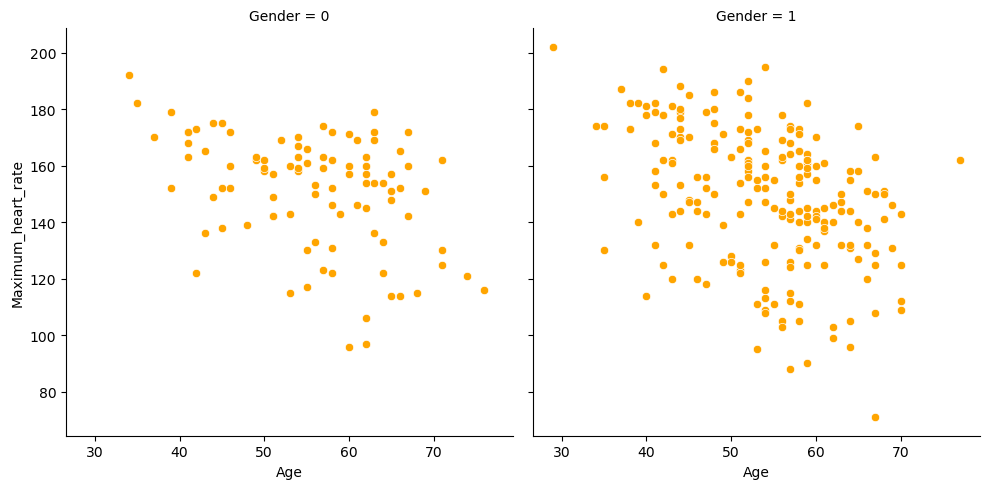

In [50]:
sns.relplot(x ='Age', y ='Maximum_heart_rate', col = 'Gender', data =heart_data, color = 'orange')

<AxesSubplot:xlabel='Exercise_induced_angina', ylabel='Count'>

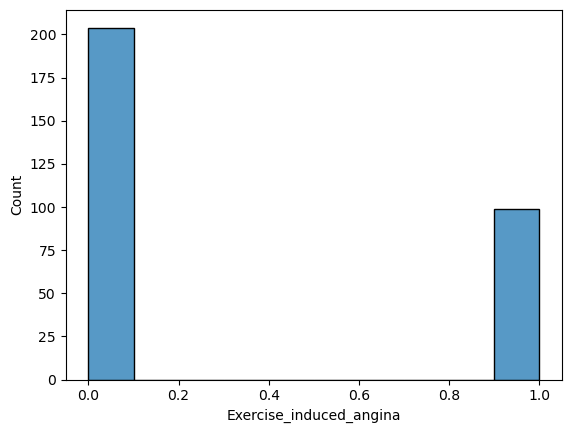

In [51]:
#Show histogram for Exercise_induced_angina
sns.histplot(heart_data['Exercise_induced_angina'])

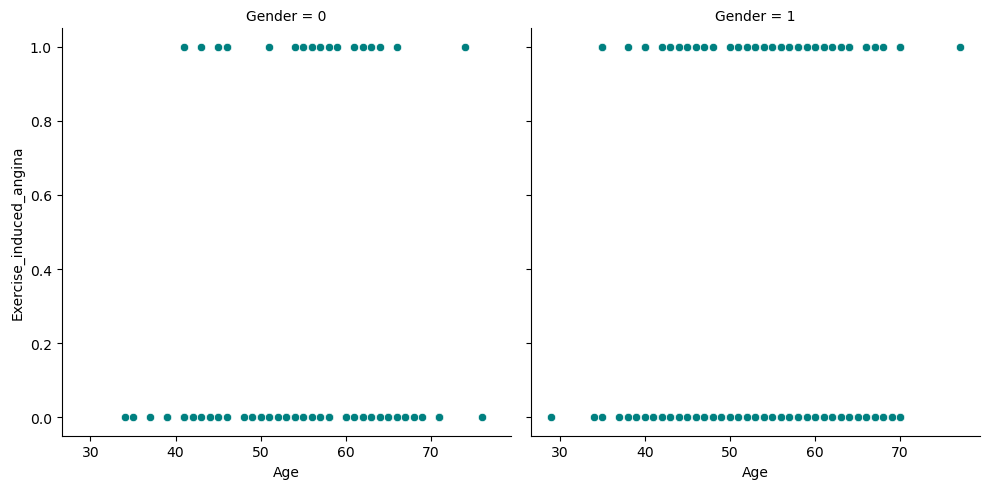

In [52]:
sns.relplot(x ='Age', y ='Exercise_induced_angina', col = 'Gender', data =heart_data, color = 'teal')

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST_depression', ylabel='Density'>

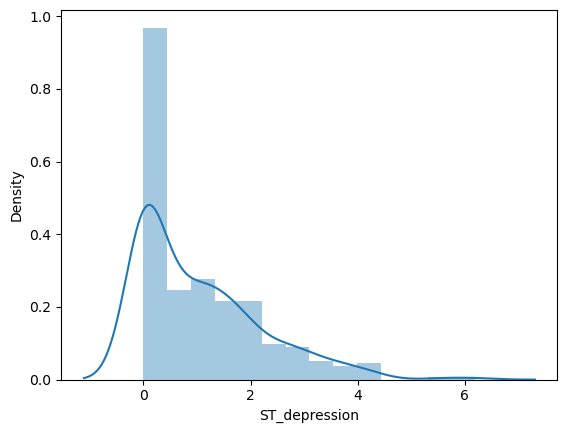

In [53]:
#Show histogram for ST_depression
sns.distplot(heart_data['ST_depression'])

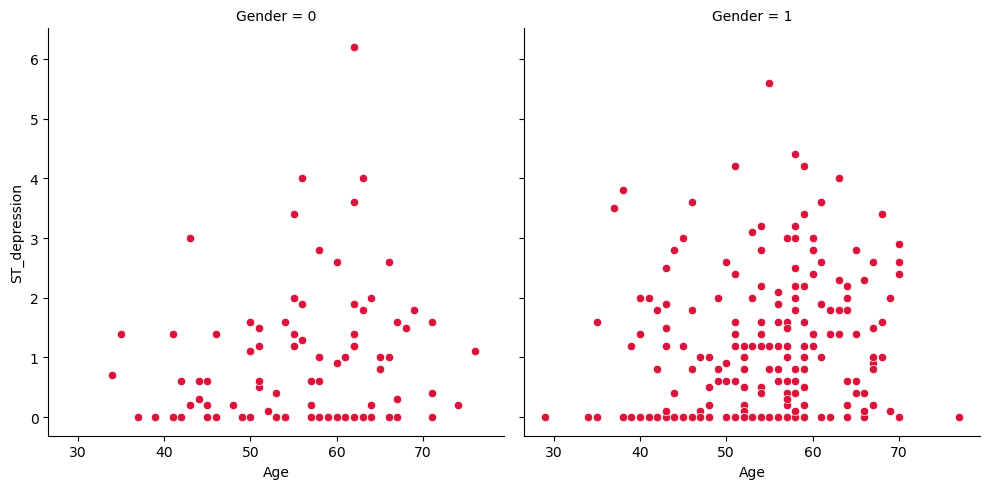

In [54]:
sns.relplot(x ='Age', y ='ST_depression', col = 'Gender', data =heart_data, color = 'crimson')

<AxesSubplot:xlabel='Major_vessels', ylabel='Count'>

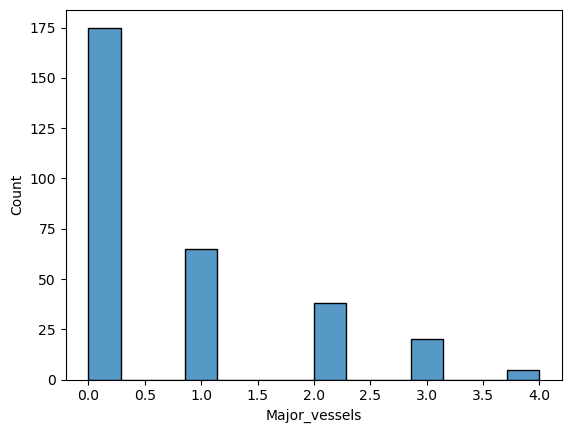

In [55]:
#Show histogram for Major_vessels
sns.histplot(heart_data['Major_vessels'])

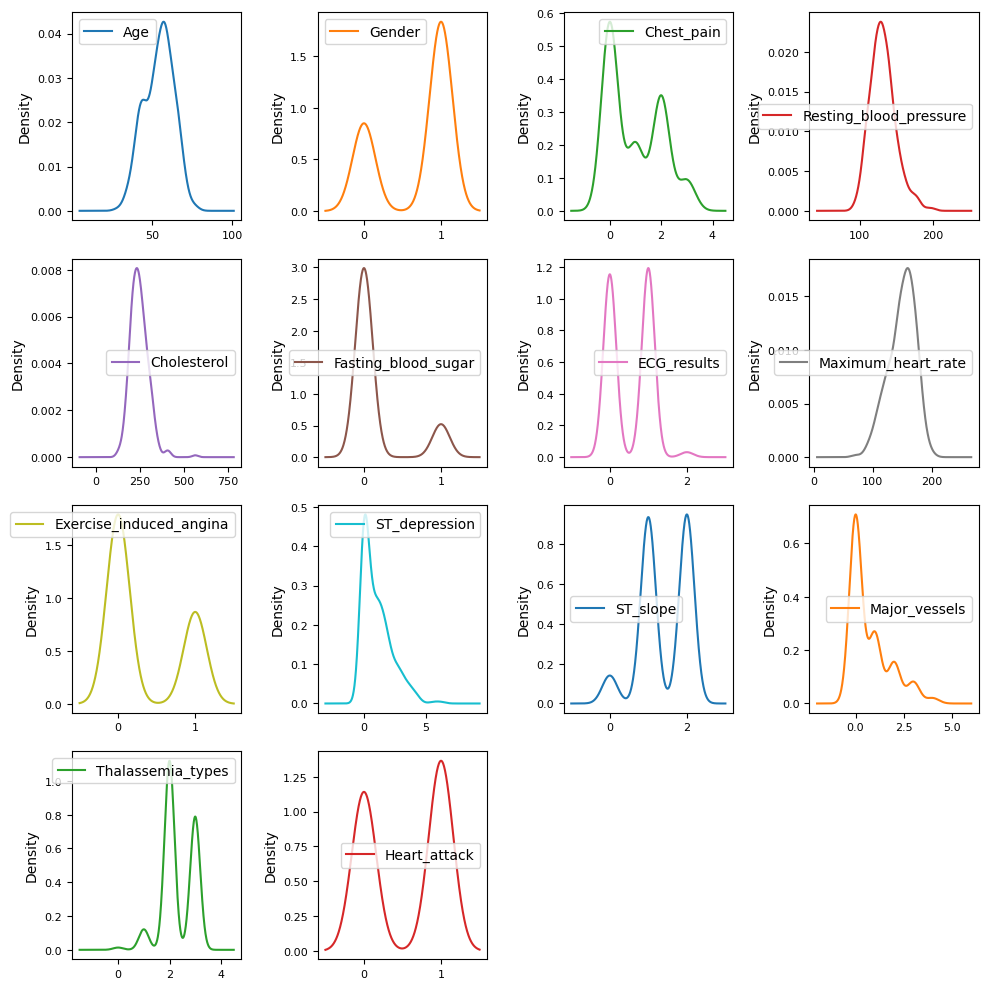

In [56]:
heart_data.plot(kind='density' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


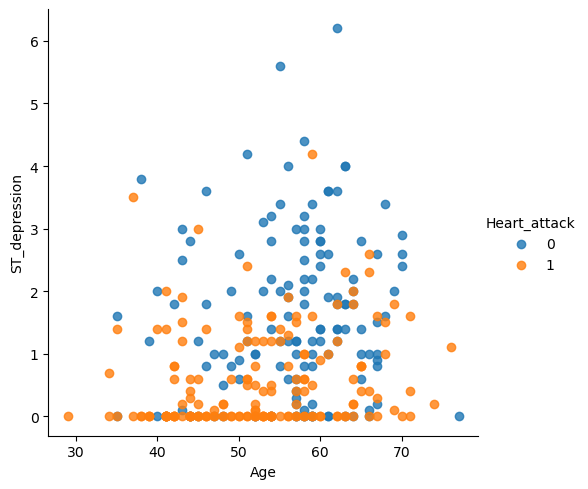

In [58]:
sns.lmplot('Age' , 'ST_depression' , data=heart_data , hue='Heart_attack' , fit_reg=False , height=5)
plt.show()

In [61]:
# checking the distribution of Target Variable
heart_data['Heart_attack'].value_counts()

1    165
0    138
Name: Heart_attack, dtype: int64

### Splitting the features and target

In [62]:
X = heart_data.drop(columns='Heart_attack', axis=1)
Y = heart_data['Heart_attack']

In [64]:
X

,Age,Gender,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [65]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: Heart_attack, Length: 303, dtype: int64

### Splitting the data into training and test data

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### Logistic Regression Model Training

In [68]:
model = LogisticRegression()

In [69]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [70]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [71]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [72]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [73]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


### Building a predictive system

In [74]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\singh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
